In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Importing and Rescaling Data


In [2]:
from sklearn.datasets import load_breast_cancer  

X = load_breast_cancer().data
y = load_breast_cancer().target
y_names = load_breast_cancer().target_names

print(X.shape, y.shape) # 569 instances, 30 features, 1 target
print(y_names) # two categories

(569, 30) (569,)
['malignant' 'benign']


/Users/gkaushik/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


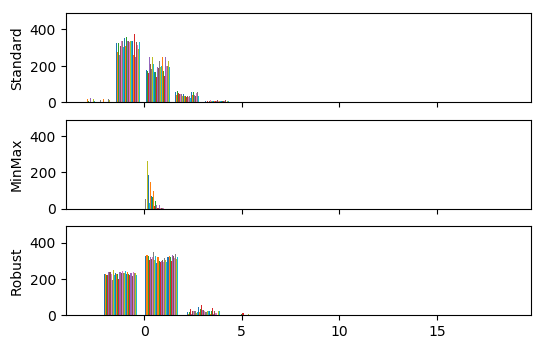

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

X_std = StandardScaler().fit_transform(X)
X_mm = MinMaxScaler().fit_transform(X)
X_rb = RobustScaler().fit_transform(X)

# plot
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, sharey=True, dpi=100)
ax1.hist(X_std)
ax1.set_ylabel('Standard')
ax2.hist(X_mm)
ax2.set_ylabel('MinMax')
ax3.hist(X_rb)
ax3.set_ylabel('Robust')
fig.show()

# Training a Basic Classifier

0.9680851063829787
             precision    recall  f1-score   support

  malignant       0.99      0.93      0.96        74
     benign       0.96      0.99      0.97       114

avg / total       0.97      0.97      0.97       188



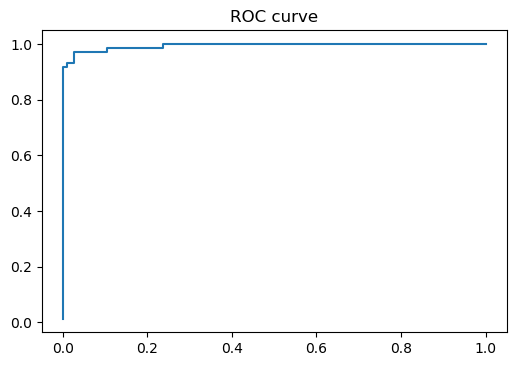

In [4]:
""" unscaled data """

# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# train model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X=X_train, y=y_train)

# get predictions
predictions = lr.predict(X=X_test)

# metrics
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_true=y_test, y_pred=predictions))
print(classification_report(y_true=y_test, y_pred=predictions, target_names=y_names))

# ROC curve
from sklearn.metrics import roc_curve
y_proba = lr.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_proba[:,0], pos_label=0)
plt.figure(dpi=100)
plt.plot(fpr, tpr, '-')
plt.title('ROC curve')
plt.show()

0.9840425531914894
             precision    recall  f1-score   support

  malignant       0.97      0.98      0.98        63
     benign       0.99      0.98      0.99       125

avg / total       0.98      0.98      0.98       188



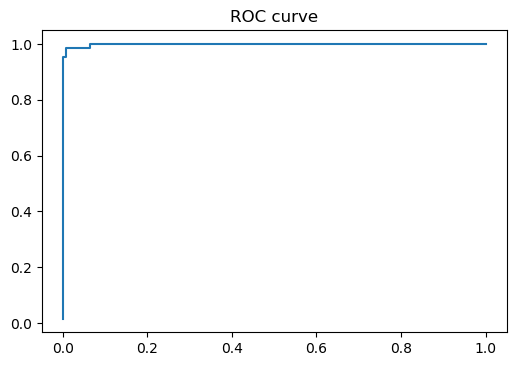

In [5]:
""" std scaled data """

# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.33)

# train model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X=X_train, y=y_train)

# get predictions
predictions = lr.predict(X=X_test)

# metrics
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_true=y_test, y_pred=predictions))
print(classification_report(y_true=y_test, y_pred=predictions, target_names=y_names))

# ROC curve
from sklearn.metrics import roc_curve
y_proba = lr.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_proba[:,0], pos_label=0)
plt.figure(dpi=100)
plt.plot(fpr, tpr, '-')
plt.title('ROC curve')
plt.show()

0.9521276595744681
             precision    recall  f1-score   support

  malignant       0.98      0.87      0.92        62
     benign       0.94      0.99      0.97       126

avg / total       0.95      0.95      0.95       188



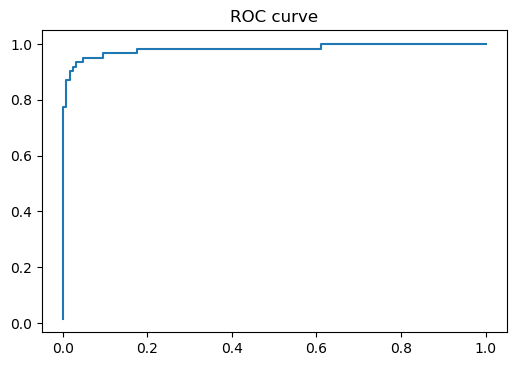

In [6]:
""" minmax scaled data """

# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_mm, y, test_size=0.33)

# train model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X=X_train, y=y_train)

# get predictions
predictions = lr.predict(X=X_test)

# metrics
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_true=y_test, y_pred=predictions))
print(classification_report(y_true=y_test, y_pred=predictions, target_names=y_names))

# ROC curve
from sklearn.metrics import roc_curve
y_proba = lr.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_proba[:,0], pos_label=0)
plt.figure(dpi=100)
plt.plot(fpr, tpr, '-')
plt.title('ROC curve')
plt.show()

0.9946808510638298
             precision    recall  f1-score   support

  malignant       1.00      0.99      0.99        70
     benign       0.99      1.00      1.00       118

avg / total       0.99      0.99      0.99       188



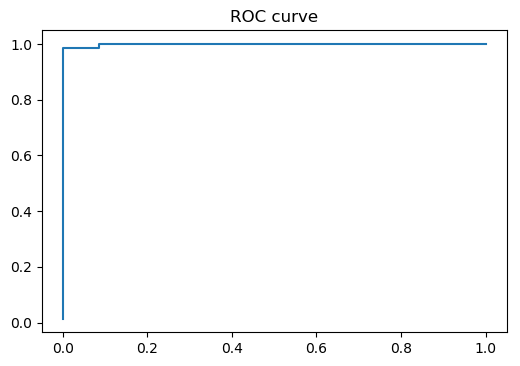

In [7]:
""" robust scaled data """

# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_rb, y, test_size=0.33)

# train model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X=X_train, y=y_train)

# metrics
from sklearn.metrics import accuracy_score, classification_report
predictions = lr.predict(X=X_test)
print(accuracy_score(y_true=y_test, y_pred=predictions))
print(classification_report(y_true=y_test, y_pred=predictions, target_names=y_names))

# ROC curve
from sklearn.metrics import roc_curve
y_proba = lr.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_proba[:,0], pos_label=0)
plt.figure(dpi=100)
plt.plot(fpr, tpr, '-')
plt.title('ROC curve')
plt.show()

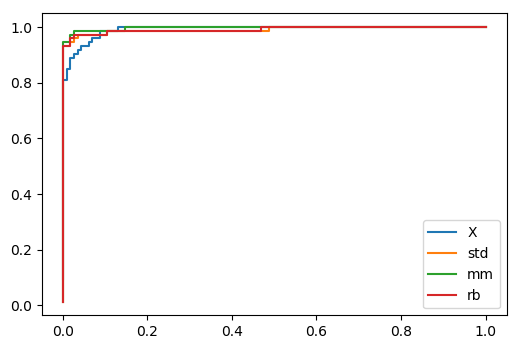

In [8]:
""" All together """

def get_roc_values(X, y, clf, seed_=24):
    # set seed
    np.random.seed(seed_)
    # split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    # train classifier
    clf.fit(X=X_train, y=y_train)
    # ROC curve
    y_proba = clf.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_proba[:,0], pos_label=0)
    return fpr, tpr, clf

plt.figure(dpi=100)
data = [X, X_std, X_mm, X_rb]
labels = ['X', 'std', 'mm', 'rb']
for data_, label_ in zip(data, labels):
    clf = LogisticRegression()
    fpr, tpr, _ = get_roc_values(data_, y, clf)
    plt.plot(fpr, tpr, '-', label=label_)
plt.legend()
plt.show()

## Pipeline

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# scaler
scaler = StandardScaler(with_mean=True)

# set classifiers
classifiers = [LogisticRegression(penalty='l1'), 
               LogisticRegression(penalty='l2'),
               RandomForestClassifier(),
               SVC(kernel='linear'),
               SVC(kernel='rbf')]

names = ['LRL1',  'LRL2', 'RF', 'SVC_l', 'SVC_r']

for clf, name in zip(classifiers, names):
    # Run pipeline
    pipe = Pipeline([('scale', scaler), ('clf', clf)])
    pipe.fit(X_train, y_train)
    print(f'{name}: \t{pipe.score(X_test, y_test):.3f}')  

LRL1: 	0.984
LRL2: 	0.989
RF: 	0.952
SVC_l: 	0.984
SVC_r: 	0.973


## GridSearch

In [10]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

# set up params for grid search
params = {'penalty':('l1', 'l2'), 
          'tol':[0.0001, 0.001, 0.01],
          'C':[1.0, 0.1, 0.001, 0.0001]}

# set model
lr_gs = LogisticRegression()

# run gridsearch over multiple parameters
gridsearch = GridSearchCV(lr_gs, params)
gridsearch.fit(X_train, y_train)
print(gridsearch.best_estimator_)
print(gridsearch.best_score_)
print(gridsearch.best_params_)
print(gridsearch.best_estimator_.score(X_test, y_test))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.9658792650918635
{'C': 1.0, 'penalty': 'l1', 'tol': 0.0001}
0.9946808510638298


## GridSearch with Pipeline

In [11]:
# set up pipe
scaler = StandardScaler()
lr = LogisticRegression()
pipe = Pipeline([('scale', scaler), ('lr', lr)])

# set params for clf
params = {
    'lr__penalty':('l1', 'l2'), 
    'lr__tol':[0.0001, 0.001, 0.01],
    'lr__C':[1.0, 0.1, 0.001, 0.0001]
}

# set up gridsearch
gridsearch = GridSearchCV(pipe, params)
gridsearch.fit(X_train, y_train)
print(gridsearch.best_score_)
print(gridsearch.best_params_)

0.968503937007874
{'lr__C': 1.0, 'lr__penalty': 'l1', 'lr__tol': 0.001}


## Pipeline and GridSearch to select PCA

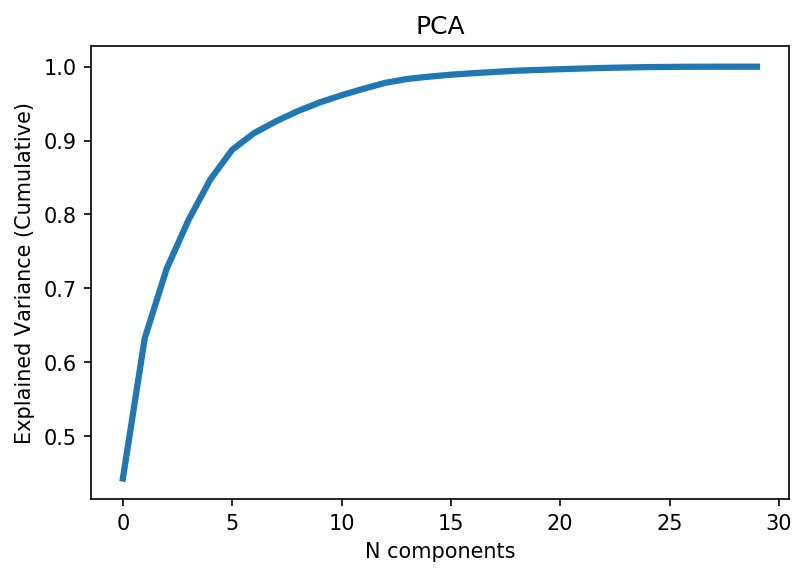

In [12]:
""" How many PCs to use? Decide by classifier accuracy """

from sklearn.decomposition import PCA

# pca and explained var
pca=PCA()
pca.fit(scaler.fit_transform(X))
exp_var = np.cumsum(pca.explained_variance_)
exp_var /= np.max(exp_var)

# plot pca
plt.figure(dpi=150)
plt.plot(exp_var, linewidth=3)
plt.axis('tight')
plt.xlabel('N components')
plt.ylabel('Explained Variance (Cumulative)')
plt.title('PCA')
plt.show()

0.973753280839895
{'lr__C': 1.0, 'pca__n_components': 11}


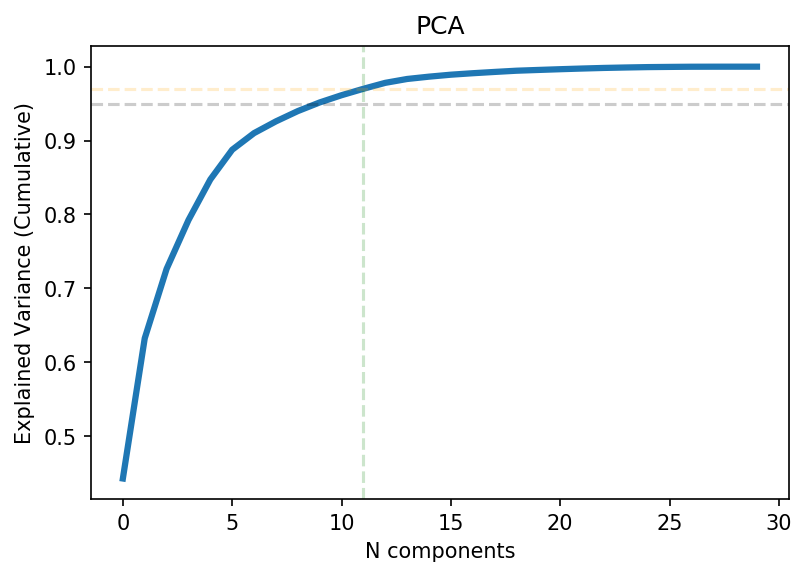

In [13]:
""" Pipe + GridSearch on PCA components, StandardScaler """

# set up pieces
scaler = StandardScaler()
lr = LogisticRegression()
pipe = Pipeline(steps=[('scale', scaler), ('pca', pca), ('lr', lr)])

# params
n_components = list(range(2, X.shape[1]))
C_s = np.logspace(-1,1,3)
params = {
    'pca__n_components':n_components,
    'lr__C':C_s
}

# grid search
gridsearch = GridSearchCV(pipe, params)
gridsearch.fit(X_train, y_train)
print(gridsearch.best_score_)
print(gridsearch.best_params_)

# best component
best_n = gridsearch.best_estimator_.named_steps['pca'].n_components

# plot pca w/ best component
plt.figure(dpi=150)
plt.plot(exp_var, linewidth=3)
plt.axvline(x=best_n, alpha=0.2, color='g', linestyle='--')
plt.axhline(y=exp_var[best_n], alpha=0.2, color='orange', linestyle='--')
plt.axhline(y=0.95, alpha=0.2, color='k', linestyle='--')

plt.axis('tight')
plt.xlabel('N components')
plt.ylabel('Explained Variance (Cumulative)')
plt.title('PCA')
plt.show()

0.9763779527559056
{'lr__C': 10.0, 'pca__n_components': 5}


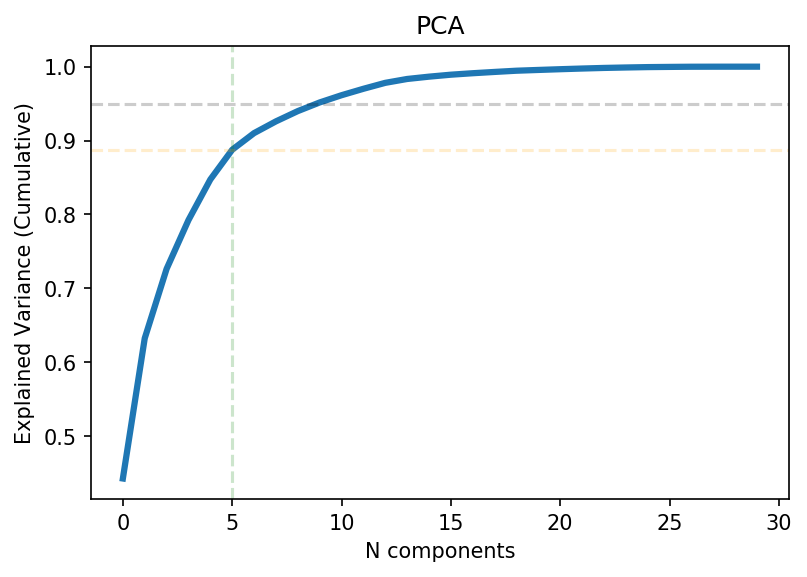

In [14]:
""" Pipe + GridSearch on PCA components, MinMaxScaler """

# set up pieces
scaler = MinMaxScaler()
lr = LogisticRegression()
pipe = Pipeline(steps=[('scale', scaler), ('pca', pca), ('lr', lr)])

# params
n_components = list(range(2, X.shape[1]))
C_s = np.logspace(-1,1,3)
params = {
    'pca__n_components':n_components,
    'lr__C':C_s
}

gridsearch = GridSearchCV(pipe, params)
gridsearch.fit(X_train, y_train)
print(gridsearch.best_score_)
print(gridsearch.best_params_)

# best component
best_n = gridsearch.best_estimator_.named_steps['pca'].n_components

# plot pca w/ best component
plt.figure(dpi=150)
plt.plot(exp_var, linewidth=3)
plt.axvline(x=best_n, alpha=0.2, color='g', linestyle='--')
plt.axhline(y=exp_var[best_n], alpha=0.2, color='orange', linestyle='--')
plt.axhline(y=0.95, alpha=0.2, color='k', linestyle='--')

plt.axis('tight')
plt.xlabel('N components')
plt.ylabel('Explained Variance (Cumulative)')
plt.title('PCA')
plt.show()